## PRACTICAL 4: ASSOCIATION RULE MINING ##

## 1. APRIORI ALGORITHM ##

In [71]:
import numpy as np # linear algebra
import pandas as pd

**A. Explore the dataset**

In [72]:
#import bike_sales dataset
data = pd.read_excel("Bike_Sales.xlsx")
#View dataset as pandas dataframe
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,2814,4342,7156
3,2017-01-01,1,January,2017,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",2,713,1120,814,1426,2240
4,2017-01-01,1,January,2017,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",2,344,540,392,688,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2021-12-31,31,December,2021,52,Adults (35-64),F,United Kingdom,England,Bikes,Road Bikes,"Road-250 Black, 58",2,1555,2443,1776,3110,4886
113032,2021-12-31,31,December,2021,25,Young Adults (25-34),F,Germany,Hessen,Bikes,Road Bikes,"Road-550-W Yellow, 38",1,713,1120,407,713,1120
113033,2021-12-31,31,December,2021,26,Young Adults (25-34),M,Australia,Queensland,Bikes,Road Bikes,"Road-550-W Yellow, 42",1,713,1120,407,713,1120
113034,2021-12-31,31,December,2021,33,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 38",1,1252,2295,1043,1252,2295


In [73]:
data.shape

(113036, 18)

The dataset has 113036 rows of the purchase orders of people from different countries. These orders can be analysed and association rules can be generated using Market Basket Analysis by algorithms like Apriori Algorithm. We are specifically interested in the products purchased and how to use that to inform and maximise sales on each day

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Products Sold')]

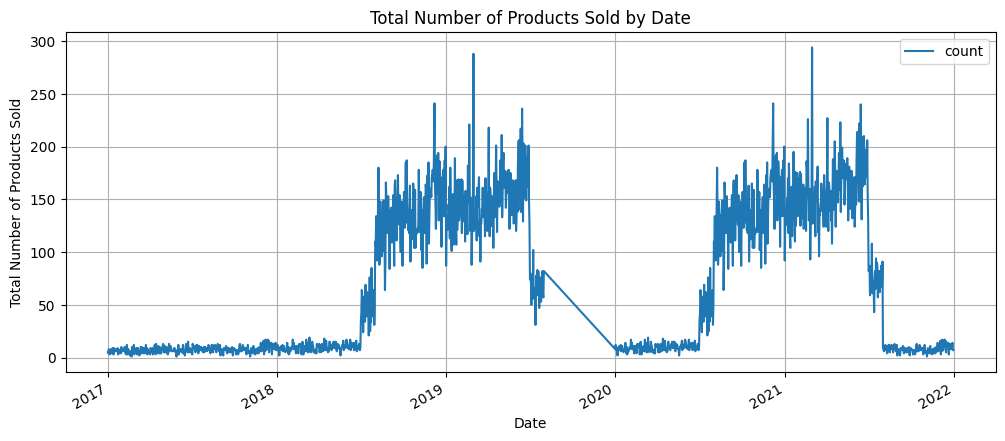

In [74]:
data.groupby(['Date'])['Product'].agg(['count']).plot(figsize=(12,5), 
grid=True, title="Total Number of Products Sold by Date").set(xlabel="Date", ylabel="Total Number of Products Sold")

In [75]:
#Let's subset the dataframe to only respond to the question at hand
data2=data[["Date", "Product"]]
#View the subsetted dataframe
data2.head()

,Date,Product
0,2017-01-01,"Road-250 Red, 44"
1,2017-01-01,"Mountain-200 Black, 46"
2,2017-01-01,"Road-150 Red, 48"
3,2017-01-01,"Road-550-W Yellow, 38"
4,2017-01-01,"Road-750 Black, 44"


In [76]:
#Number of products sold on each date
data2['Product'].value_counts()

Product
Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
                           ...  
Mountain-100 Silver, 48       58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: count, Length: 130, dtype: int64

In [77]:
#Let's view the  Product count as a visual
import plotly.express as px

#Generate a function for the plot
def bar_plot(df,col):

    fig = px.bar(df,
        x = df[col].value_counts().keys(), 
        y = df[col].value_counts().values,
        color= df[col].value_counts().keys()
    )
    fig.update_layout(
    xaxis_title= col,
    yaxis_title="Count",
    legend_title=col,
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
    
    fig.show()



bar_plot(data2,'Product')

**B. Tansform the products for the apriori analysis**

In [78]:
transactions = [a[1]['Product'].tolist() for a in list(data2.groupby(['Date']))]

In [79]:
#View the transactions or product groupings
transactions

[['Road-250 Red, 44',
  'Mountain-200 Black, 46',
  'Road-150 Red, 48',
  'Road-550-W Yellow, 38',
  'Road-750 Black, 44'],
 ['Road-550-W Yellow, 38',
  'Road-550-W Yellow, 48',
  'Road-550-W Yellow, 40',
  'Road-250 Red, 58'],
 ['Mountain-200 Black, 38',
  'Mountain-200 Silver, 42',
  'Mountain-200 Silver, 42',
  'Road-150 Red, 48',
  'Road-750 Black, 48',
  'Road-750 Black, 48',
  'Road-750 Black, 44',
  'Road-550-W Yellow, 44'],
 ['Mountain-200 Black, 38',
  'Road-150 Red, 52',
  'Road-650 Red, 62',
  'Road-150 Red, 44',
  'Road-550-W Yellow, 38'],
 ['Road-350-W Yellow, 48', 'Road-650 Red, 48', 'Road-650 Black, 60'],
 ['Road-150 Red, 62',
  'Mountain-500 Black, 44',
  'Road-750 Black, 48',
  'Road-550-W Yellow, 48',
  'Road-150 Red, 62',
  'Road-750 Black, 48'],
 ['Road-750 Black, 52',
  'Road-350-W Yellow, 42',
  'Road-350-W Yellow, 40',
  'Road-550-W Yellow, 40'],
 ['Mountain-200 Black, 46',
  'Road-150 Red, 62',
  'Mountain-200 Black, 42',
  'Road-350-W Yellow, 48',
  'Road-550-W

In [80]:
#Import libraries to transform the transaction groupings
#TransactionEncoder converts item lists into transaction data for frequent itemset mining
!pip install mlxtend
import mlxtend
from mlxtend.preprocessing import TransactionEncoder

for details about TransactionEncoder-http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

In [81]:
te = TransactionEncoder()

In [82]:
te_ary = te.fit(transactions).transform(transactions)

In [83]:
te.columns_

['AWC Logo Cap',
 'All-Purpose Bike Stand',
 'Bike Wash - Dissolver',
 'Classic Vest, L',
 'Classic Vest, M',
 'Classic Vest, S',
 'Fender Set - Mountain',
 'HL Mountain Tire',
 'HL Road Tire',
 'Half-Finger Gloves, L',
 'Half-Finger Gloves, M',
 'Half-Finger Gloves, S',
 'Hitch Rack - 4-Bike',
 'Hydration Pack - 70 oz.',
 'LL Mountain Tire',
 'LL Road Tire',
 'Long-Sleeve Logo Jersey, L',
 'Long-Sleeve Logo Jersey, M',
 'Long-Sleeve Logo Jersey, S',
 'Long-Sleeve Logo Jersey, XL',
 'ML Mountain Tire',
 'ML Road Tire',
 'Mountain Bottle Cage',
 'Mountain Tire Tube',
 'Mountain-100 Black, 38',
 'Mountain-100 Black, 42',
 'Mountain-100 Black, 44',
 'Mountain-100 Black, 48',
 'Mountain-100 Silver, 38',
 'Mountain-100 Silver, 42',
 'Mountain-100 Silver, 44',
 'Mountain-100 Silver, 48',
 'Mountain-200 Black, 38',
 'Mountain-200 Black, 42',
 'Mountain-200 Black, 46',
 'Mountain-200 Silver, 38',
 'Mountain-200 Silver, 42',
 'Mountain-200 Silver, 46',
 'Mountain-400-W Silver, 38',
 'Mountain-4

In [84]:
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [85]:
#Call the newly transformed dataframe "pf"
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()


In [86]:
#View the  transformed products and the counts, and frequent items
pf

,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L",...,"Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
count,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,...,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,890,1324,980,1414,1416,1418,898,1104,1278,1154,...,1582,1554,1564,1566,1594,1600,884,1302,1238,1248


In [87]:
pf.iloc[0]-pf.iloc[3]

AWC Logo Cap                  782
All-Purpose Bike Stand        348
Bike Wash - Dissolver         692
Classic Vest, L               258
Classic Vest, M               256
                             ... 
Touring-3000 Yellow, 62        72
Water Bottle - 30 oz.         788
Women's Mountain Shorts, L    370
Women's Mountain Shorts, M    434
Women's Mountain Shorts, S    424
Length: 130, dtype: object

In [88]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions

,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L",...,"Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1668,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1669,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [89]:
item

,Count,Item
126,788,Water Bottle - 30 oz.
0,782,AWC Logo Cap
32,781,"Mountain-200 Black, 38"
99,778,"Sport-100 Helmet, Black"
52,776,Patch Kit/8 Patches
6,774,Fender Set - Mountain
101,770,"Sport-100 Helmet, Red"
100,764,"Sport-100 Helmet, Blue"
23,760,Mountain Tire Tube
35,737,"Mountain-200 Silver, 38"


Text-Mining

**C. Generate a wordcloud of the count of the products**

In [90]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


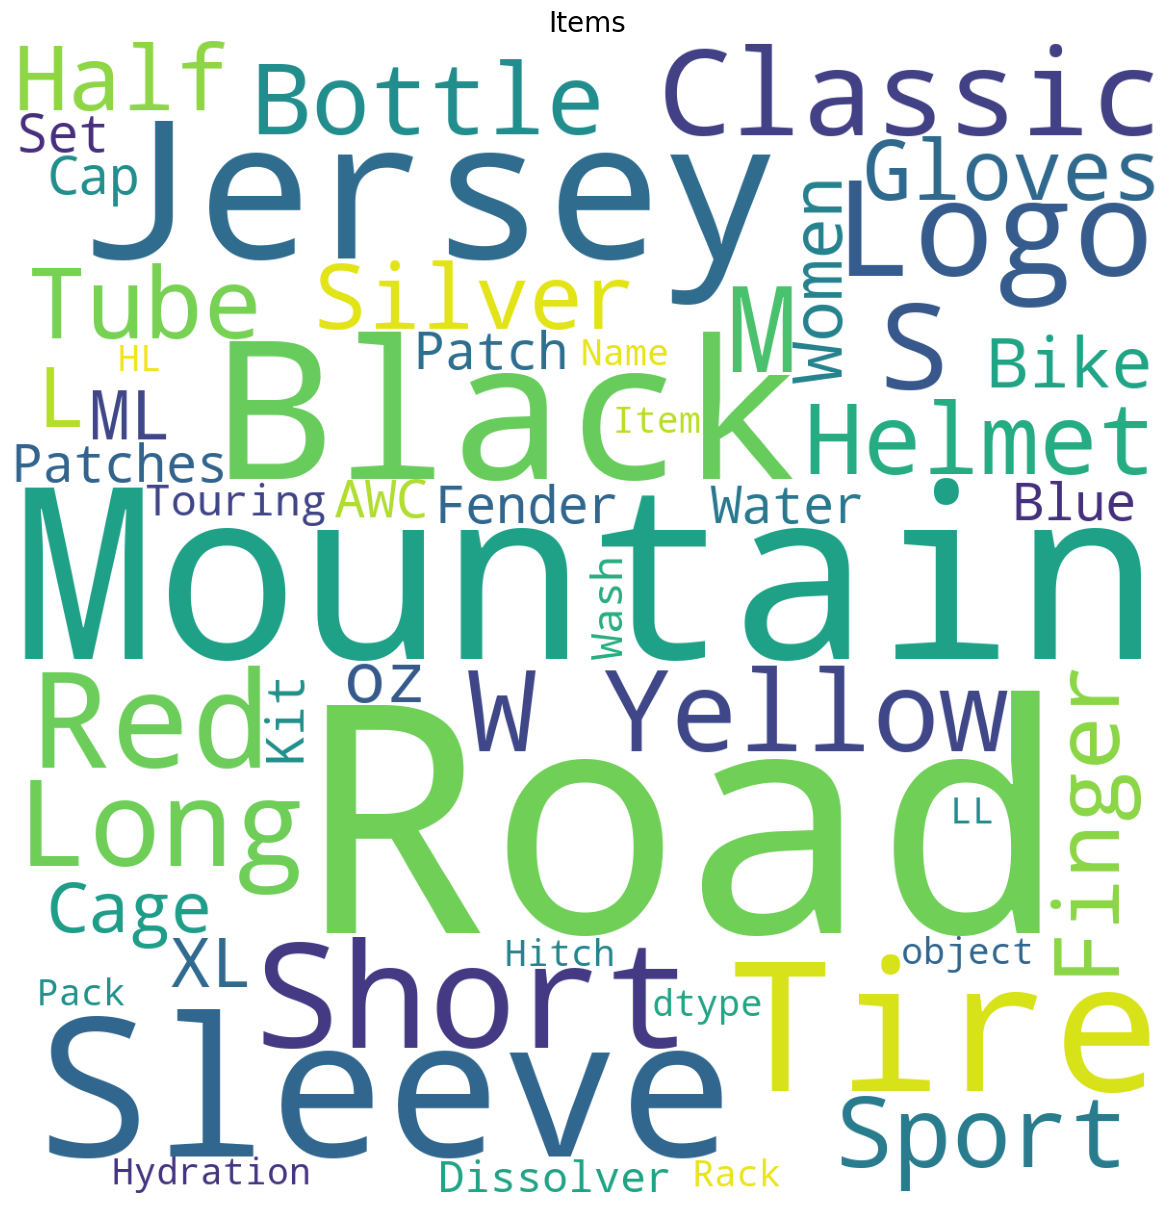

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [92]:
#Or a tree map of the products
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

**D. Run the apriori analysis of association**

To construct association rules between elements or items, the algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:

Support: The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :

Support(I)=Number of transactions containing I/Total number of Transactions

Confidence: This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2, in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1.

Confidence(I1->I2)=Number of Transactions containing I1 and I2/(Total Number of Transactions containing I1)

Lift: Lift is the ratio between the confidence and support expressed as :

Lift(I1->I2)=Confidence(I1->I2)/Support(I2)

In [93]:
#Import the apriori libraries and the association rules
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [94]:
#Look for the frequently purchased products
#We are using a minimum support value of 1% or 0.001
freq_items = apriori(transactions, min_support=0.001, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 41548584 combinations | Sampling itemset size 4

MemoryError: Unable to allocate 64.7 GiB for an array with shape (10387146, 4, 1672) and data type bool

The `MemoryError: Unable to allocate 85.6 GiB for an array with shape (10991642, 5, 1672) and data type bool` error indicates that your system does not have enough memory to handle the data being processed by the [`apriori`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fseth%2FDesktop%2FBig%20Data%20Mining%20and%20analytics%2FWeek%205%20-%20Data%20Mining%20Concept%2FPractical4_Association_Mining.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X45sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A8%2C%22character%22%3A13%7D%7D%5D%2C%229db75a0a-731a-4773-b805-93dfc97ac19f%22%5D "Go to definition") function. This is a common issue when working with large datasets and computationally intensive algorithms like Apriori.

Here are some strategies to address this issue:

### 1. Reduce the Dataset Size
If possible, try to reduce the size of your dataset. This can be done by filtering out less relevant transactions or items.

### 2. Increase Minimum Support
Increasing the [`min_support`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fseth%2FDesktop%2FBig%20Data%20Mining%20and%20analytics%2FWeek%205%20-%20Data%20Mining%20Concept%2FPractical4_Association_Mining.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X45sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A8%2C%22character%22%3A35%7D%7D%5D%2C%229db75a0a-731a-4773-b805-93dfc97ac19f%22%5D "Go to definition") parameter will reduce the number of frequent itemsets generated, which can significantly reduce memory usage.

### 3. Use More Efficient Data Structures
Ensure that your data is stored in the most memory-efficient format. For example, using sparse matrices can save a lot of memory.

### 4. Use Alternative Algorithms
Consider using more memory-efficient algorithms like FP-Growth, which can handle larger datasets more efficiently than Apriori.

### Example: Increasing Minimum Support

Here’s how you can increase the [`min_support`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fseth%2FDesktop%2FBig%20Data%20Mining%20and%20analytics%2FWeek%205%20-%20Data%20Mining%20Concept%2FPractical4_Association_Mining.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X45sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A8%2C%22character%22%3A35%7D%7D%5D%2C%229db75a0a-731a-4773-b805-93dfc97ac19f%22%5D "Go to definition") parameter to reduce memory usage:



from mlxtend.frequent_patterns import apriori

Increase min_support to reduce memory usage
freq_items = apriori(transactions, min_support=0.1, use_colnames=True, verbose=1)



### Example: Using Sparse Matrices

If your data is sparse, you can convert it to a sparse matrix format before applying the Apriori algorithm:



from scipy.sparse import csr_matrix
from mlxtend.frequent_patterns import apriori

Convert transactions to a sparse matrix
transactions_sparse = csr_matrix(transactions.values)

Apply Apriori algorithm
freq_items = apriori(transactions_sparse, min_support=0.05, use_colnames=True, verbose=1)



### Example: Using FP-Growth

FP-Growth is an alternative algorithm that is more memory-efficient than Apriori:



from mlxtend.frequent_patterns import fpgrowth

# Apply FP-Growth algorithm
freq_items = fpgrowth(transactions, min_support=0.05, use_colnames=True, verbose=1)



### Summary

To resolve the `MemoryError`, you can:
1. Reduce the dataset size.
2. Increase the [`min_support`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fseth%2FDesktop%2FBig%20Data%20Mining%20and%20analytics%2FWeek%205%20-%20Data%20Mining%20Concept%2FPractical4_Association_Mining.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X45sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A8%2C%22character%22%3A35%7D%7D%5D%2C%229db75a0a-731a-4773-b805-93dfc97ac19f%22%5D "Go to definition") parameter.
3. Use more memory-efficient data structures like sparse matrices.
4. Consider using alternative algorithms like FP-Growth.

By applying these strategies, you should be able to reduce memory usage and successfully run the frequent itemset mining algorithm on your dataset.

Notice that because this is a big dataset, apriori algorithm struggles to process it and the kernel might crash. Thus apriori is suited to smaller datasets

**E. Using a suitable dataset**

In [113]:
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [96]:
#Import the smaller "Groceries_dataset.csv"
data3=pd.read_csv("Groceries_dataset.csv")
data3

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [97]:
df=data3.groupby(['Member_number','Date'])['itemDescription'].apply(sum)
# Group the data by 'Member_number' and 'Date', then aggregate the 'itemDescription' column by summing the values.
# This operation is performed on the 'data3' DataFrame and the result is stored in 'df'.
print(df)

C:\Users\seth\AppData\Local\Temp\ipykernel_37768\838255424.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.



Member_number  Date      
1000           15-03-2015           sausagewhole milksemi-finished breadyogurt
               24-06-2014                          whole milkpastrysalty snack
               24-07-2015                           canned beermisc. beverages
               25-11-2015                              sausagehygiene articles
               27-05-2015                               sodapickled vegetables
                                                   ...                        
4999           24-01-2015    tropical fruitberriesother vegetablesyogurtkit...
               26-12-2015                                   bottled waterherbs
5000           09-03-2014                          fruit/vegetable juiceonions
               10-02-2015               sodaroot vegetablessemi-finished bread
               16-11-2014                         bottled beerother vegetables
Name: itemDescription, Length: 14963, dtype: object


In [98]:
# Group the data by 'Member_number' and 'Date', then aggregate the 'itemDescription' column into lists of transactions
transactions2 = [a[1]['itemDescription'].tolist() for a in list(data3.groupby(['Member_number','Date']))]

In [99]:
transactions2

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [100]:
# Initialize the TransactionEncoder
te = TransactionEncoder()

In [101]:
te_ary = te.fit(transactions2).transform(transactions2)
"""
Transforms the given transactions using the specified transaction encoder.

This code snippet fits the transaction encoder to the provided transactions 
and then transforms these transactions into a one-hot encoded numpy array.

Variables:
    te_ary (numpy.ndarray): The transformed transactions in a one-hot encoded format.
    transactions2 (list of list of str): The input transactions to be encoded.
    te (TransactionEncoder): The transaction encoder instance used for fitting and transforming.

Returns:
    numpy.ndarray: The one-hot encoded representation of the input transactions.
"""

'\nTransforms the given transactions using the specified transaction encoder.\n\nThis code snippet fits the transaction encoder to the provided transactions \nand then transforms these transactions into a one-hot encoded numpy array.\n\nVariables:\n    te_ary (numpy.ndarray): The transformed transactions in a one-hot encoded format.\n    transactions2 (list of list of str): The input transactions to be encoded.\n    te (TransactionEncoder): The transaction encoder instance used for fitting and transforming.\n\nReturns:\n    numpy.ndarray: The one-hot encoded representation of the input transactions.\n'

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [13]:
te.columns_
"""
This code snippet accesses the columns attribute of the 'te' object.

Attributes:
    te.columns_ (Index or array-like): The columns attribute of the 'te' object, 
    which typically represents the column labels of a DataFrame or similar data structure.
"""

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [102]:
transactions2 = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions2.describe()

In [103]:
pf

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963,...,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903


In [16]:
pf.iloc[0]-pf.iloc[3]

Instant food products      60
UHT-milk                  320
abrasive cleaner           22
artif. sweetener           29
baby cosmetics              3
                         ... 
white bread               359
white wine                175
whole milk               2363
yogurt                   1285
zwieback                   60
Length: 167, dtype: object

In [104]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions2

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


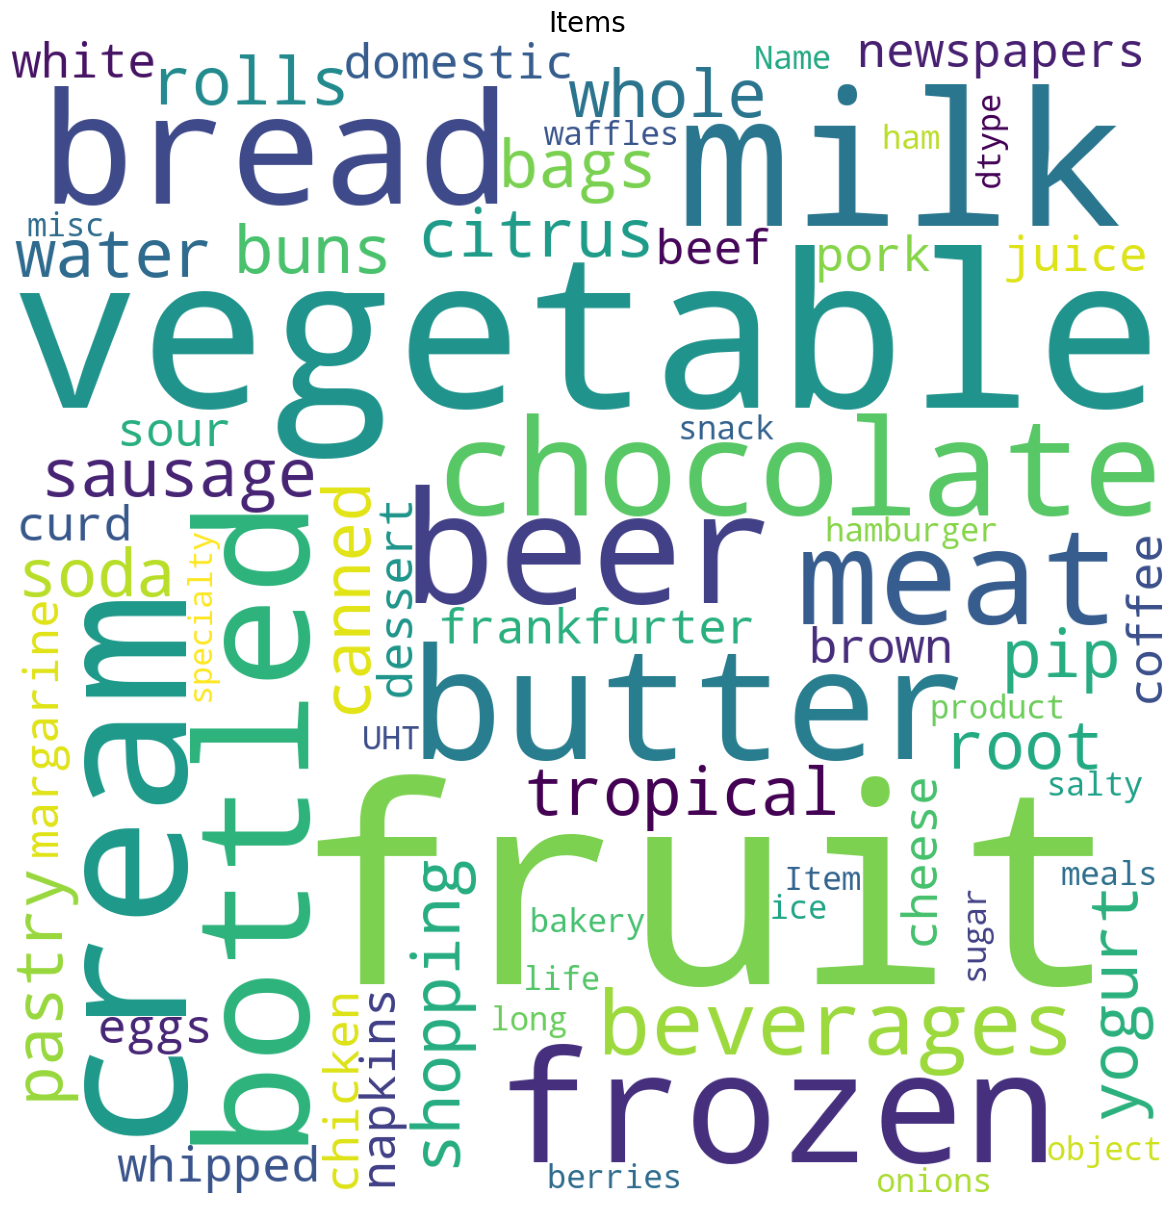

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [106]:
import plotly.express as px
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

In [108]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [107]:
freq_items = apriori(transactions2, min_support=0.001, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 28 combinations | Sampling itemset size 4e 3


,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
5,0.001136,(bathroom cleaner)
6,0.033950,(beef)


In [110]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [112]:
#Calculate the rules association parameters
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
4,(rolls/buns),(UHT-milk),0.110005,0.021386,0.001804,0.016403,0.767013,-0.000548,0.994934,-0.254457


**F. Plot the association parameters**

In [26]:
fig=px.scatter(rules['support'], rules['lift'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="lift",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Lift')
    
)

fig.show()

Text(0.5, 1.0, 'lift vs Confidence')

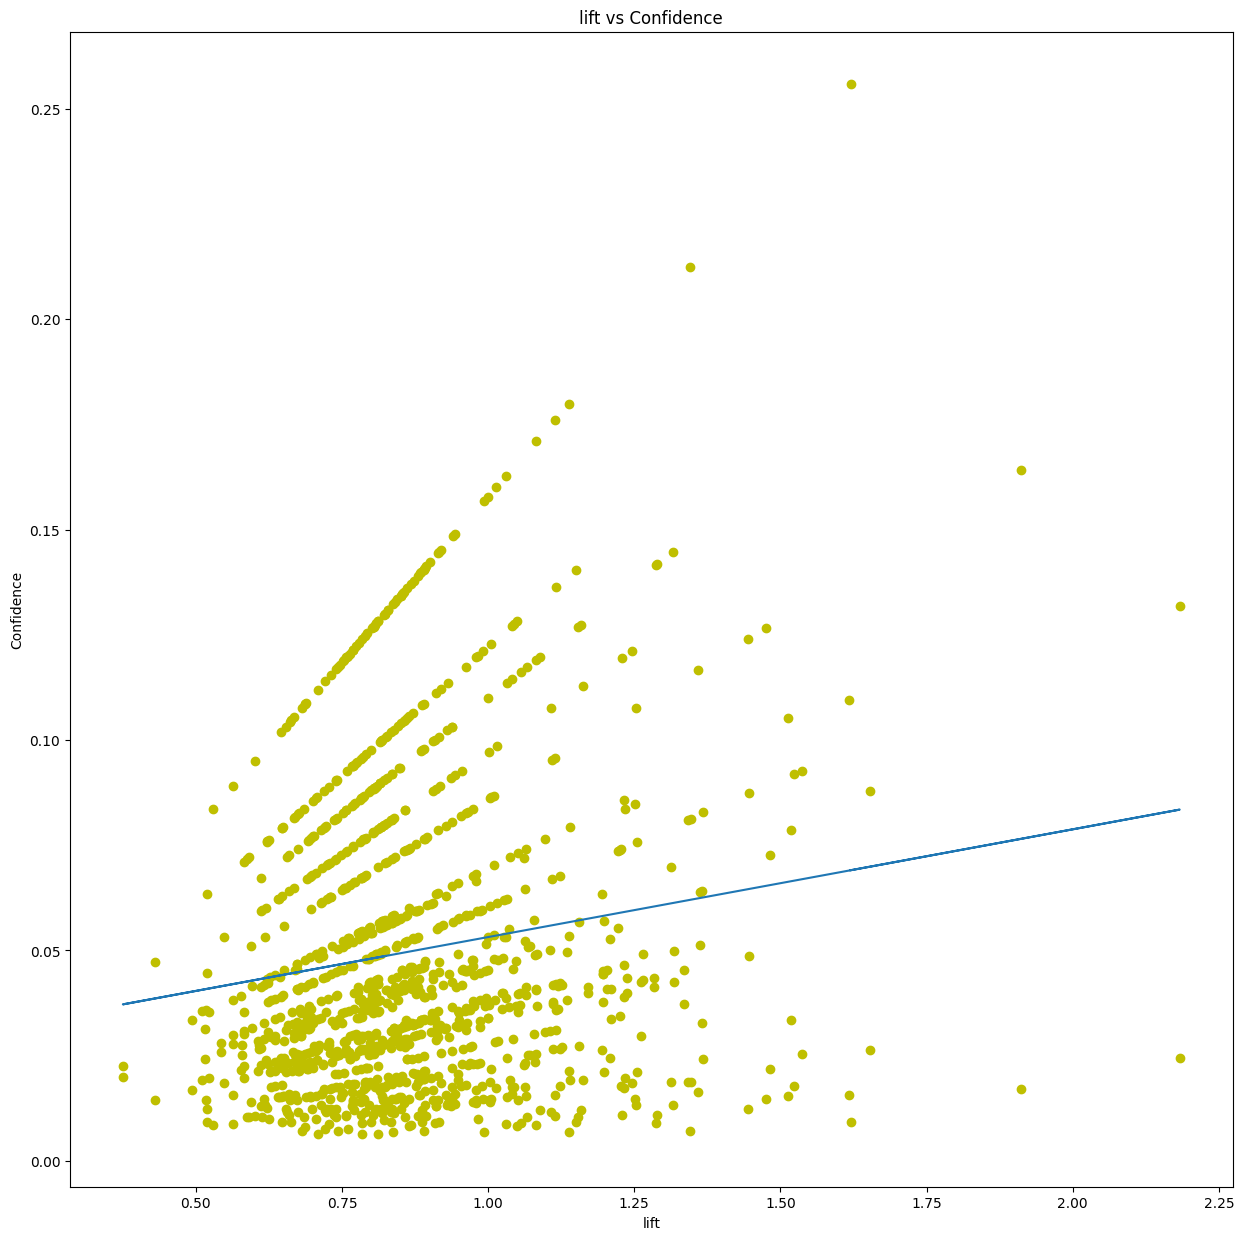

In [27]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

## 2. FP-Growth ALGORITHM ##

Looks for frequent itemset patterns like apriori but taking a shorter time to process

FP Growth is one of the associative rule learning techniques which is used in machine learning for finding frequently occurring patterns.

In [ ]:
#Importing Libraries
from mlxtend.frequent_patterns import fpgrowth
